In [1]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt


In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./KAIST/CVS_M4.csv')):
    _dfs_list.append(pd.read_csv(csv_filename,header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.columns = ['sample_'+str(col) for col in df.columns]
sensor= ['Fp1-Fp3']*28+['Fp1']*23
df['sensor_postion']=sensor
subjects=[]
for i in range(0,51):
    a="subject_"+str(i)
    subjects.append(a)
#print(sensor,len(sensor))
df['subject_id']=subjects
df

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.41s/it]


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,3.960000,2.76000,1.230000,3.050000,8.370000,11.410000,10.430000,8.850000,6.220000,1.900000,...,-2.240000,-4.070000,-3.250000,-1.490000,-1.740000,-4.450000,-5.970000,-5.180000,Fp1-Fp3,subject_0
1,-7.610000,0.01000,8.320000,12.730000,12.910000,10.720000,7.180000,3.720000,1.750000,3.380000,...,25.260000,22.680000,18.330000,12.240000,9.230000,13.620000,20.810000,21.710000,Fp1-Fp3,subject_1
2,10.050000,6.51000,3.930000,4.370000,5.890000,7.040000,7.390000,6.970000,7.280000,8.480000,...,107.820000,112.890000,113.130000,109.970000,105.490000,100.630000,94.540000,89.170000,Fp1-Fp3,subject_2
3,8.330000,9.49000,8.490000,8.020000,8.290000,8.130000,6.910000,6.840000,8.770000,8.810000,...,2.070000,4.510000,-1.590000,-9.850000,-16.710000,-23.890000,-26.970000,-20.670000,Fp1-Fp3,subject_3
4,-23.790000,-18.81000,-19.090000,-21.470000,-21.300000,-19.820000,-20.840000,-23.200000,-22.190000,-18.970000,...,-1.560000,-0.310000,-2.270000,-4.390000,-5.140000,-6.250000,-7.960000,-8.680000,Fp1-Fp3,subject_4
5,-0.030000,-0.51000,-0.860000,-2.000000,-3.880000,-4.140000,-1.150000,0.810000,-0.340000,0.520000,...,-24.940000,-26.320000,-26.790000,-26.400000,-27.220000,-30.200000,-33.460000,-35.200000,Fp1-Fp3,subject_5
6,-43.020000,-45.83000,-48.720000,-50.850000,-51.580000,-52.110000,-52.700000,-53.140000,-54.910000,-58.380000,...,8.660000,8.220000,7.720000,8.460000,9.670000,9.860000,8.500000,7.370000,Fp1-Fp3,subject_6
7,-12.140000,-26.11000,-33.260000,-29.340000,-15.470000,0.310000,9.610000,7.270000,-4.140000,-17.250000,...,8.360000,11.930000,7.210000,-1.410000,-9.310000,-15.480000,-19.480000,-21.060000,Fp1-Fp3,subject_7
8,18.200000,16.12000,14.450000,14.270000,13.760000,12.920000,12.510000,12.580000,12.110000,9.980000,...,10.140000,5.350000,5.780000,7.920000,7.500000,7.070000,10.820000,14.370000,Fp1-Fp3,subject_8
9,13.260000,15.28000,11.530000,13.490000,18.850000,17.580000,14.490000,13.480000,12.610000,9.840000,...,-3.240000,-11.240000,-14.850000,-7.950000,0.890000,2.680000,3.770000,11.350000,Fp1-Fp3,subject_9


In [3]:
df1=df.head(28)
df1

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,3.96,2.76,1.23,3.05,8.37,11.41,10.43,8.85,6.22,1.90,...,-2.24,-4.07,-3.25,-1.49,-1.74,-4.45,-5.97,-5.18,Fp1-Fp3,subject_0
1,-7.61,0.01,8.32,12.73,12.91,10.72,7.18,3.72,1.75,3.38,...,25.26,22.68,18.33,12.24,9.23,13.62,20.81,21.71,Fp1-Fp3,subject_1
2,10.05,6.51,3.93,4.37,5.89,7.04,7.39,6.97,7.28,8.48,...,107.82,112.89,113.13,109.97,105.49,100.63,94.54,89.17,Fp1-Fp3,subject_2
3,8.33,9.49,8.49,8.02,8.29,8.13,6.91,6.84,8.77,8.81,...,2.07,4.51,-1.59,-9.85,-16.71,-23.89,-26.97,-20.67,Fp1-Fp3,subject_3
4,-23.79,-18.81,-19.09,-21.47,-21.30,-19.82,-20.84,-23.20,-22.19,-18.97,...,-1.56,-0.31,-2.27,-4.39,-5.14,-6.25,-7.96,-8.68,Fp1-Fp3,subject_4
5,-0.03,-0.51,-0.86,-2.00,-3.88,-4.14,-1.15,0.81,-0.34,0.52,...,-24.94,-26.32,-26.79,-26.40,-27.22,-30.20,-33.46,-35.20,Fp1-Fp3,subject_5
6,-43.02,-45.83,-48.72,-50.85,-51.58,-52.11,-52.70,-53.14,-54.91,-58.38,...,8.66,8.22,7.72,8.46,9.67,9.86,8.50,7.37,Fp1-Fp3,subject_6
7,-12.14,-26.11,-33.26,-29.34,-15.47,0.31,9.61,7.27,-4.14,-17.25,...,8.36,11.93,7.21,-1.41,-9.31,-15.48,-19.48,-21.06,Fp1-Fp3,subject_7
8,18.20,16.12,14.45,14.27,13.76,12.92,12.51,12.58,12.11,9.98,...,10.14,5.35,5.78,7.92,7.50,7.07,10.82,14.37,Fp1-Fp3,subject_8
9,13.26,15.28,11.53,13.49,18.85,17.58,14.49,13.48,12.61,9.84,...,-3.24,-11.24,-14.85,-7.95,0.89,2.68,3.77,11.35,Fp1-Fp3,subject_9


In [4]:
df2=df.tail(23)
df2

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
28,35.430000,32.04000,31.590000,31.550000,30.190000,27.780000,25.240000,22.970000,20.840000,18.240000,...,-60.950000,-58.450000,-57.030000,-55.850000,-53.890000,-51.190000,-48.250000,-46.630000,Fp1,subject_28
29,-3.570000,-5.54000,-5.820000,-6.050000,-8.130000,-10.190000,-11.920000,-14.620000,-17.320000,-19.140000,...,-3.790000,-1.670000,-0.170000,-0.690000,-1.680000,-2.530000,-3.260000,-4.600000,Fp1,subject_29
30,9.260000,8.94000,9.350000,10.320000,11.090000,11.000000,10.490000,10.530000,11.420000,12.290000,...,1.040000,3.160000,4.370000,4.290000,3.460000,2.530000,1.920000,1.700000,Fp1,subject_30
31,20.180000,19.14000,18.010000,17.820000,17.150000,16.070000,15.260000,13.970000,12.000000,10.330000,...,-24.040000,-25.030000,-26.030000,-26.240000,-25.810000,-24.880000,-23.680000,-22.740000,Fp1,subject_31
32,10.590000,11.41000,9.970000,7.290000,5.070000,4.260000,4.820000,6.310000,8.100000,9.370000,...,8.300000,10.130000,12.530000,15.250000,17.360000,17.700000,16.850000,16.170000,Fp1,subject_32
33,-21.900000,-23.47000,-24.130000,-23.680000,-22.940000,-23.110000,-23.750000,-23.300000,-22.210000,-21.590000,...,-0.090000,1.010000,1.400000,0.930000,-0.660000,-2.840000,-4.810000,-6.540000,Fp1,subject_33
34,-13.790000,-11.65000,-9.390000,-6.600000,-2.520000,2.560000,7.470000,11.490000,13.960000,14.210000,...,-8.680000,-9.090000,-9.990000,-10.950000,-10.370000,-8.450000,-7.740000,-8.830000,Fp1,subject_34
35,0.760000,-0.66000,-0.150000,1.130000,1.900000,1.360000,0.920000,2.080000,3.730000,4.730000,...,-7.780000,-3.960000,-2.520000,-4.290000,-6.080000,-6.500000,-5.920000,-4.410000,Fp1,subject_35
36,0.328066,1.33175,2.166837,2.585232,1.963132,0.362403,-0.313436,0.513190,1.796231,1.771982,...,-1.957165,-2.670704,-2.058271,-1.191185,-0.748760,-1.726848,-1.421332,2.409839,Fp1,subject_36
37,3.910000,1.43000,1.270000,3.240000,6.300000,7.390000,5.280000,2.620000,1.600000,1.520000,...,-4.530000,2.070000,6.620000,7.550000,5.360000,0.530000,-4.120000,-5.910000,Fp1,subject_37


In [5]:
ch_names = ['Fp1-Fp3']*28
# extract the data values and the channel names
data = df1.iloc[:, :-2].values  # transpose the data so that channels are in rows
ch_types = ['eeg']*28
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)

# create the raw object
raw = mne.io.RawArray(data, info)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_24316\3170589405.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1-Fp3'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


Creating RawArray with float64 data, n_channels=28, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

In [7]:

#from mne import highpass_filter

# read in your data and create a RawArray object

# high-pass filter the data
#raw = highpass_filter(raw, 1.0)

# pick the EEG channels for ICA
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 28 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_24316\3536447973.py:14: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 0.8s.


Method,fastica
Fit,19 iterations on raw data (75000 samples)
ICA components,20
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.
Using matplotlib as 2D backend.


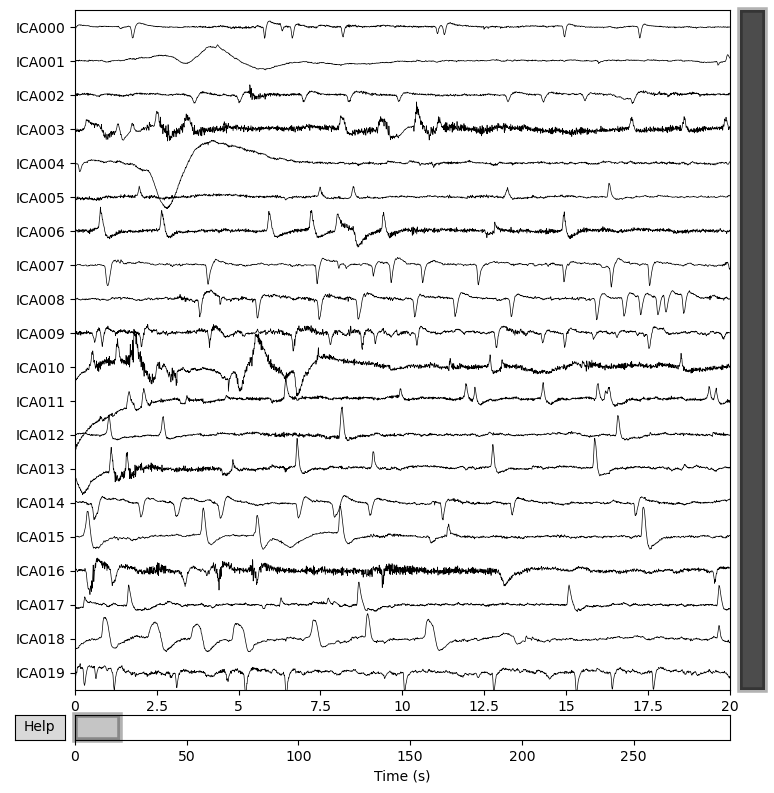

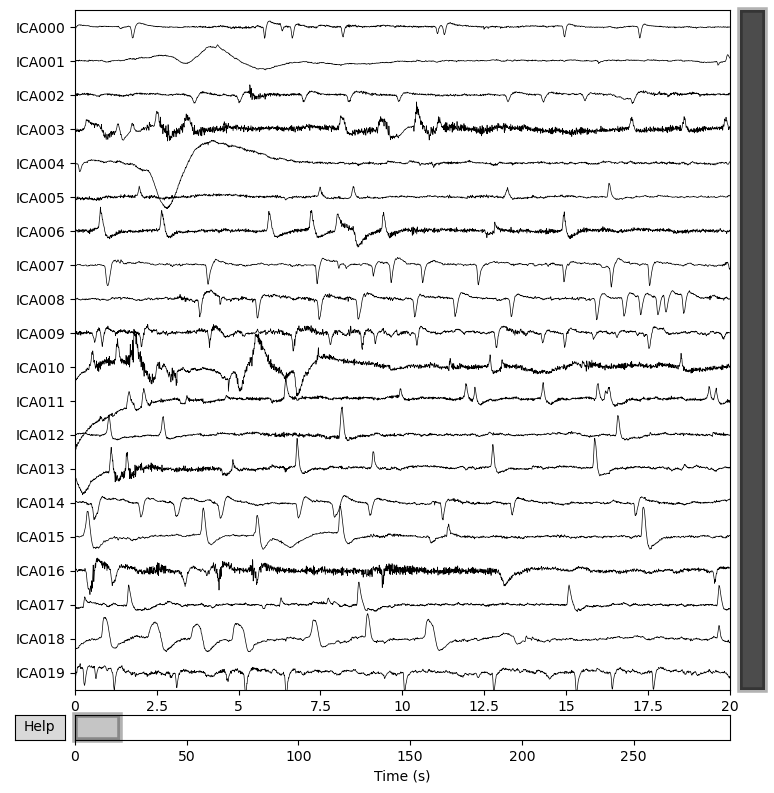

In [8]:
 ica.plot_sources(raw, block=False)

for component 0 blink are [9]


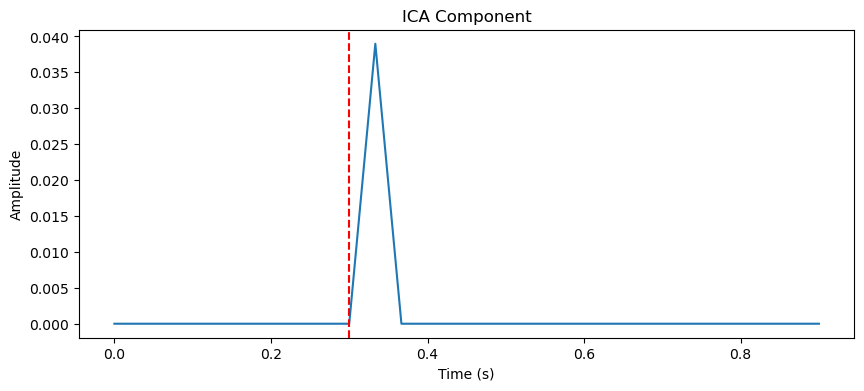

for component 1 blink are [4]


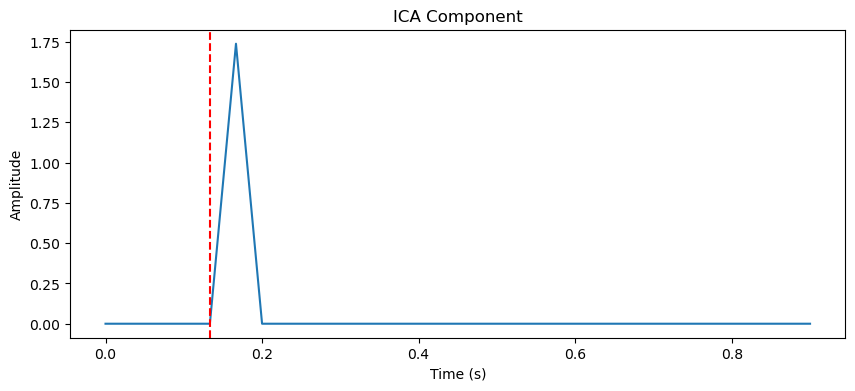

for component 2 blink are [4]


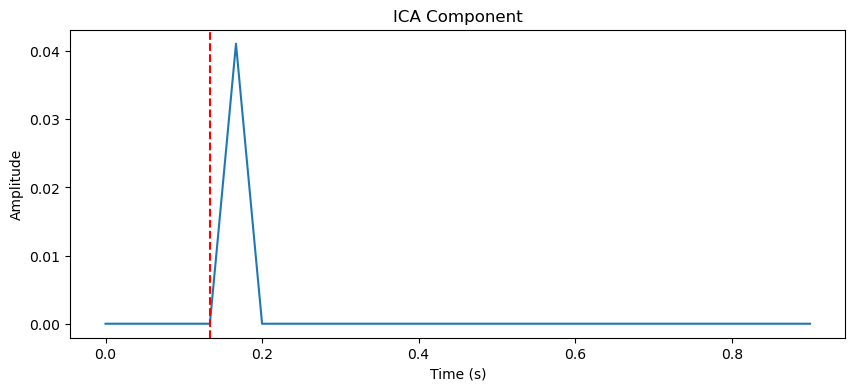

for component 3 blink are [5, 17, 19]


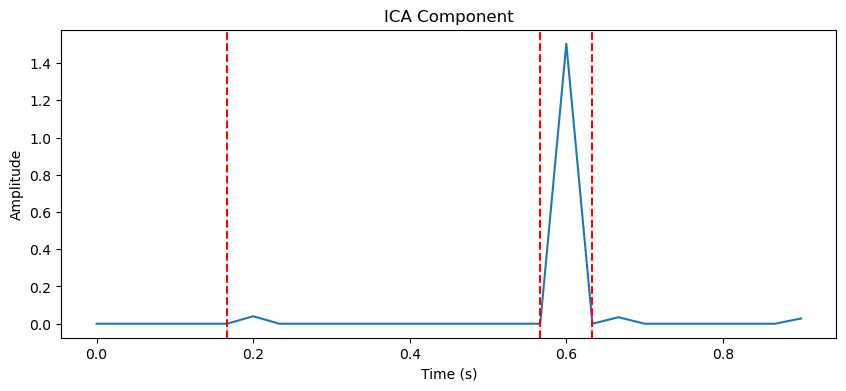

for component 4 blink are [4, 15]


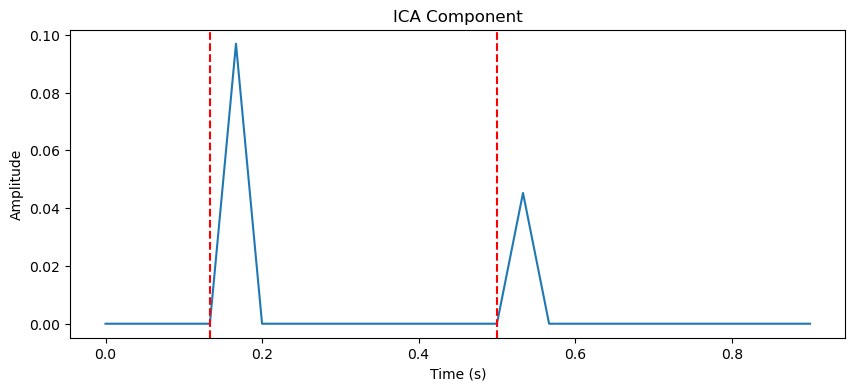

for component 5 blink are [2, 5, 24]


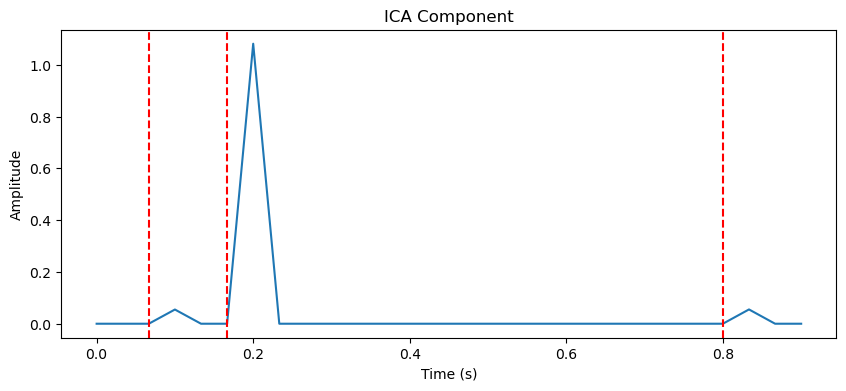

for component 6 blink are [5, 7, 17, 20, 24]


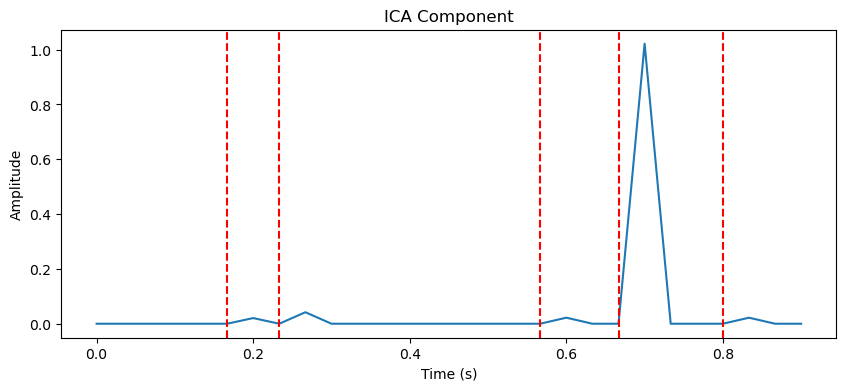

for component 7 blink are []


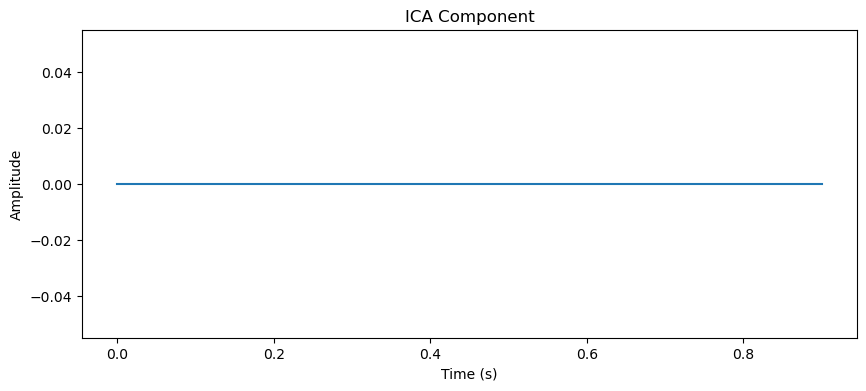

for component 8 blink are [1, 10, 25]


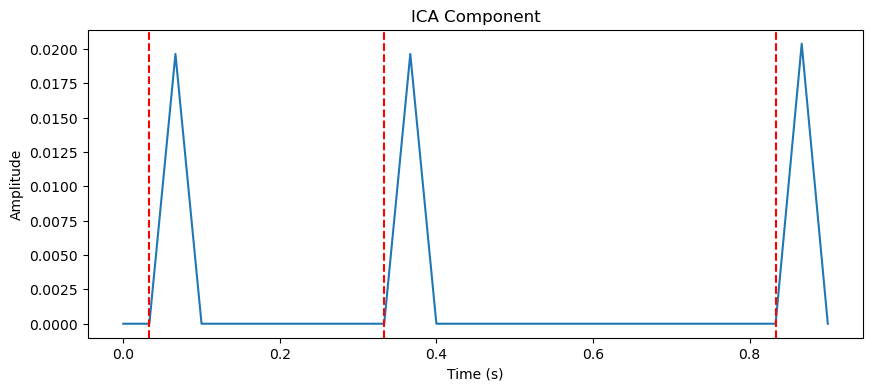

for component 9 blink are [4]


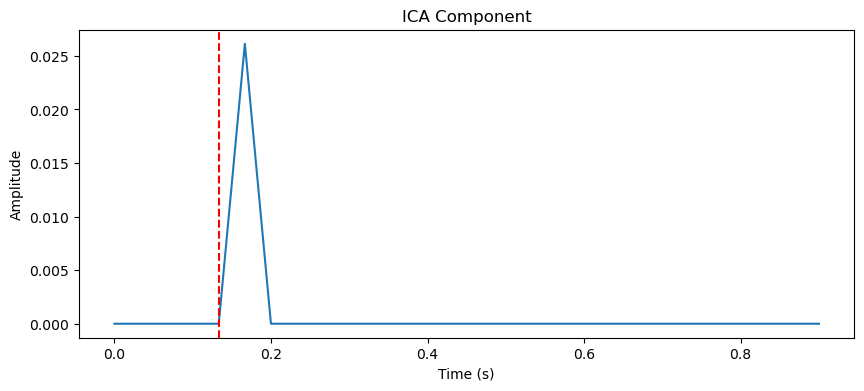

for component 10 blink are [2, 9, 12, 19]


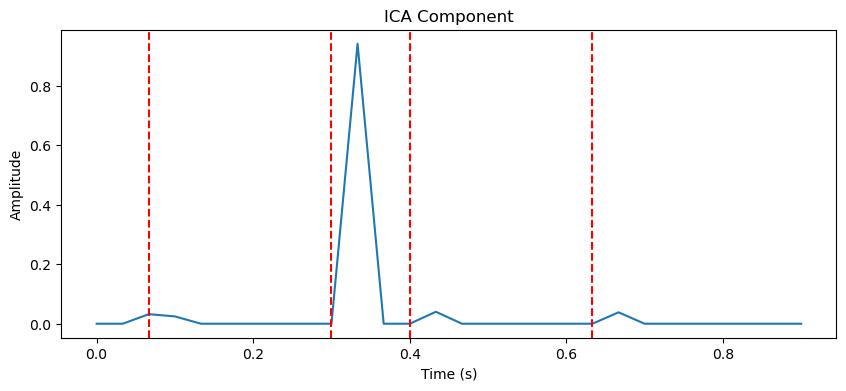

for component 11 blink are [5, 15, 22, 24]


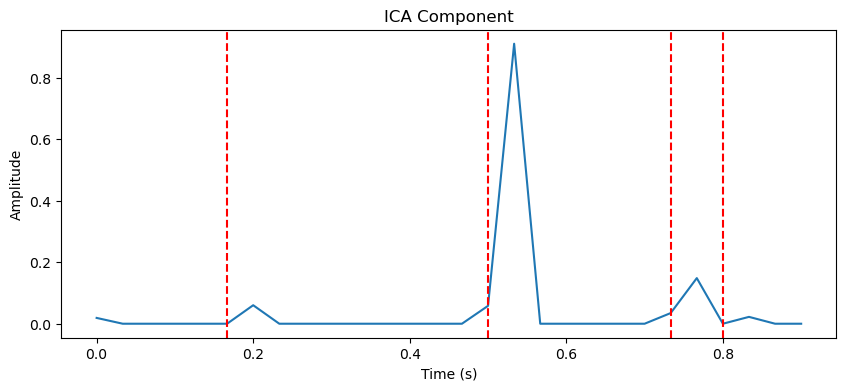

for component 12 blink are [3, 7, 12, 18, 20]


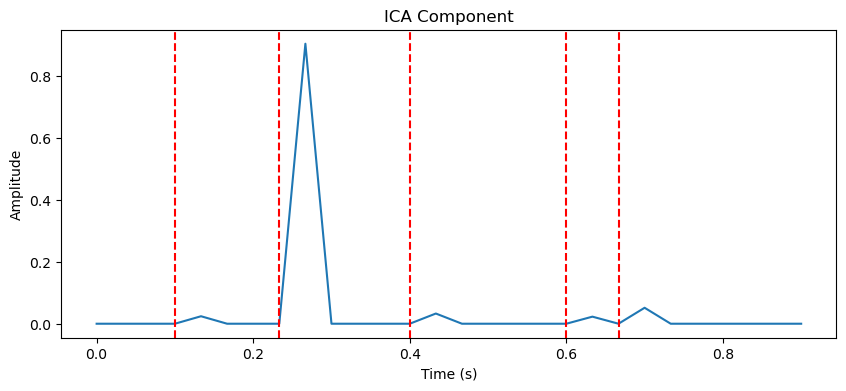

for component 13 blink are [7, 12, 15, 22]


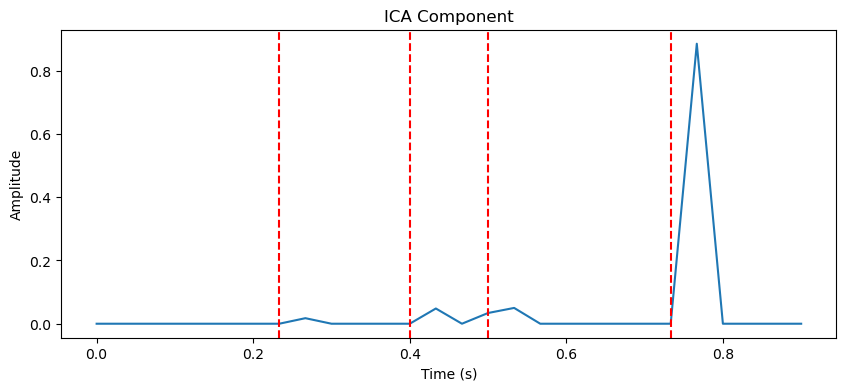

for component 14 blink are [10, 14]


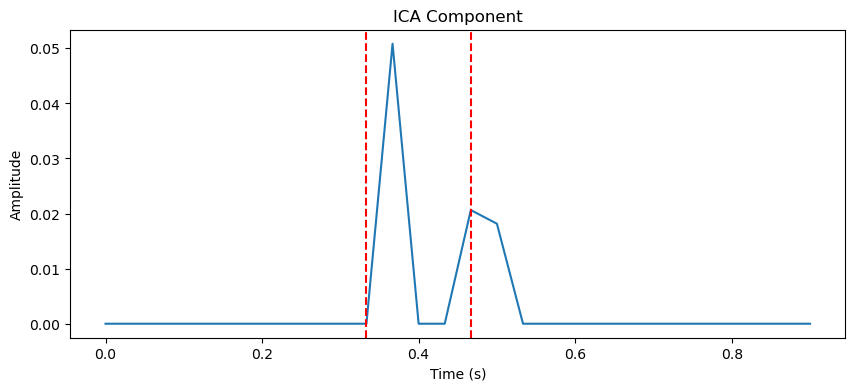

for component 15 blink are [4, 19, 24]


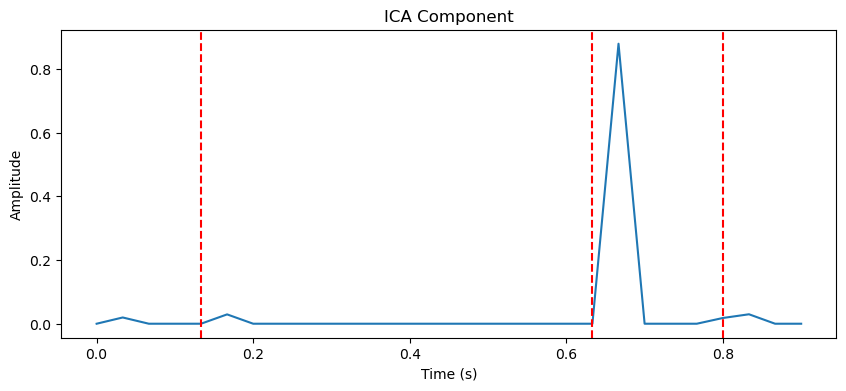

for component 16 blink are [11]


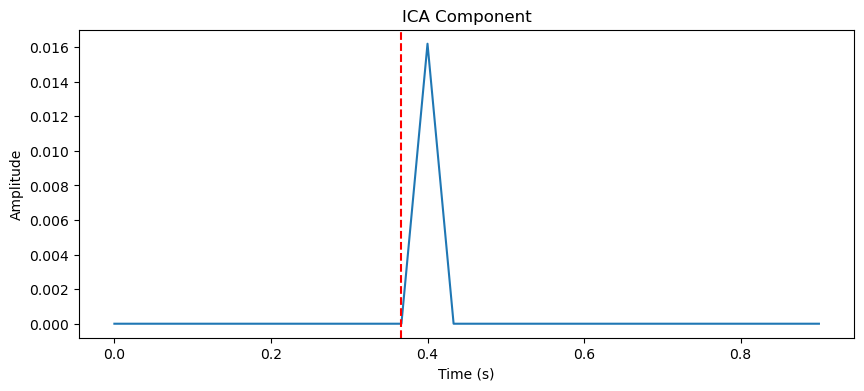

for component 17 blink are [3, 6, 18, 24]


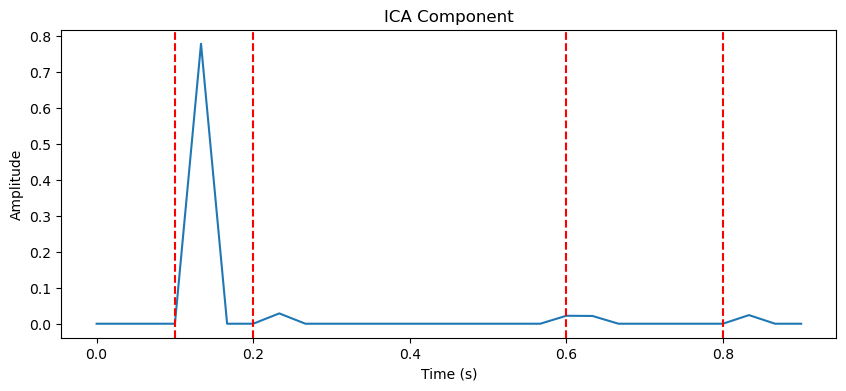

for component 18 blink are [14, 21]


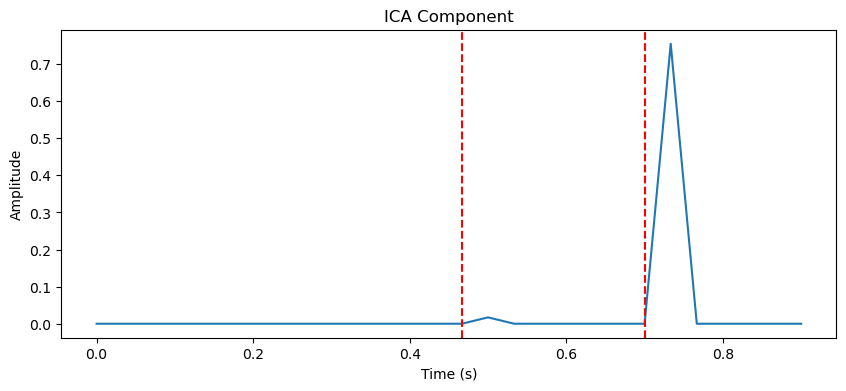

for component 19 blink are [4, 6]


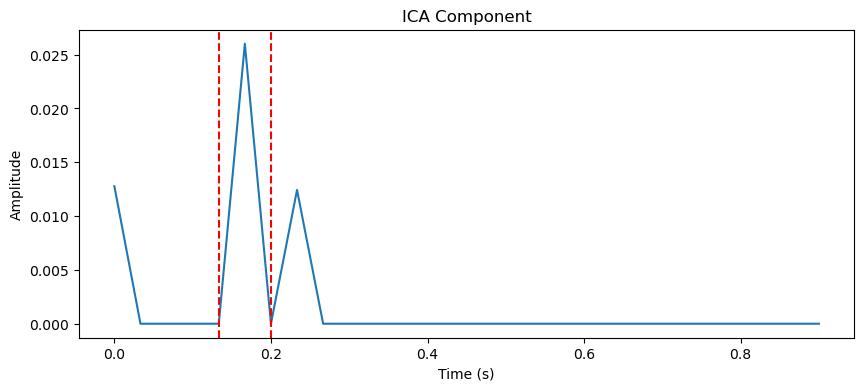

total number of blinks = 51


In [9]:
import numpy as np
from scipy.signal import find_peaks

def segment(y):
    """Extracts continuous segments of non-zero values from y."""
    s = np.concatenate(([0], np.flatnonzero(y), [len(y)]))
    return [y[s[i]:s[i+1]] for i in range(len(s)-1)], s

def blink_detection(y, fs):
    # Convert y to a NumPy array if it isn't already
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    
    """Detects blinks in a blink component y sampled at frequency fs."""
    lmin = fs // 50
    wmin = fs // 25
    wmax = fs
    
    # Calculate threshold as standard deviation of y
    threshold = 0.1* np.std(y)
    
    # Set all values below the threshold to zero
    y[y < threshold] = 0
    
    # Extract continuous segments of non-zero values from y
    Y, s = segment(y)
    #print("Y",Y)
    #print("s",s)
    t = []
    l = 0
    
    for j in range(len(Y)):
        N = len(Y[j])
        x = np.arange(N)
      
        # Find polynomial coefficients that fit Y[j]
        p = 3  # degree of polynomial
        X = np.vander(x, p+1)
       
        a = np.linalg.lstsq(X, Y[j], rcond=None)[0]
        
        # Compute the arc length of the fitted curve
       
        curve = np.polyval(a[::-1], x)
        try:
            alen = np.sum(np.sqrt(1 + np.gradient(curve)**2)) / N
        except ValueError:
            # Continue if an error occurs
            continue
        #print("j",j)   
        if wmin < N and N < wmax and lmin < alen:
            # Find the peak value and position within Y[j]
            #print("j",j)
            v = np.max(Y[j])
            p = np.argmax(Y[j])
            
            # Compute the angle between the peak and the ends of the curve
            alpha1 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], 0), p/fs)
            alpha2 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], N-1), (N-p-1)/fs)
            
            if alpha1 > 80 and alpha2 < 100:
                tl = s[j] + p - 1
                if(tl>0):
                    t.append(tl)
                    l += 1
    
    return t

b=0
e=0
fs = 30 # example sampling frequency
for i in range(ica.n_components_):
        component = ica.get_components()[:, i]
        blink_indices = blink_detection(component, fs)
        #b=b+sum(blink_indices)
        e=e+len(blink_indices)
        print("for component",i,"blink are",blink_indices)
        # Create a time axis based on the sampling frequency
        t = np.arange(len(component)) / fs
        # Plot the component signal
        plt.figure(figsize=(10, 4))
        plt.plot(t, component)
        plt.title('ICA Component')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        # Plot vertical lines at the times of the detected blinks
        for blink_index in blink_indices:
            plt.axvline(x=t[blink_index], color='r', linestyle='--')
    
        plt.show()
print("total number of blinks =",e)

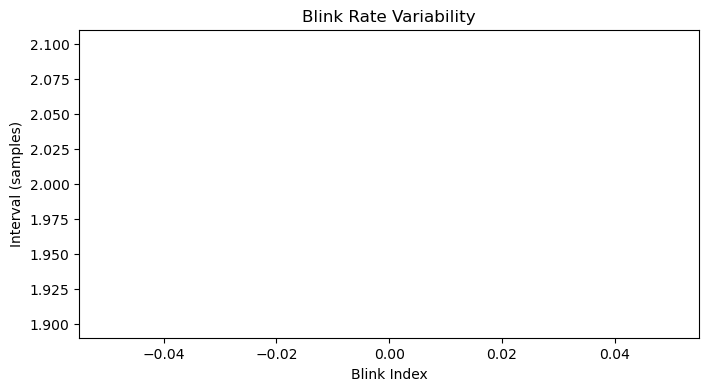

In [10]:
# Calculate blink rate variability
brv = []
for i in range(len(blink_indices)-1):
    brv.append(blink_indices[i+1] - blink_indices[i])

# Plot blink rate variability
plt.figure(figsize=(8, 4))
plt.plot(brv)
plt.title('Blink Rate Variability')
plt.xlabel('Blink Index')
plt.ylabel('Interval (samples)')
plt.show()


Effective window size : 0.109 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


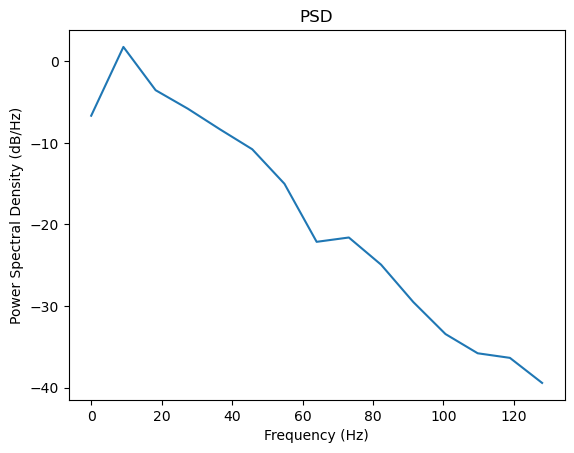

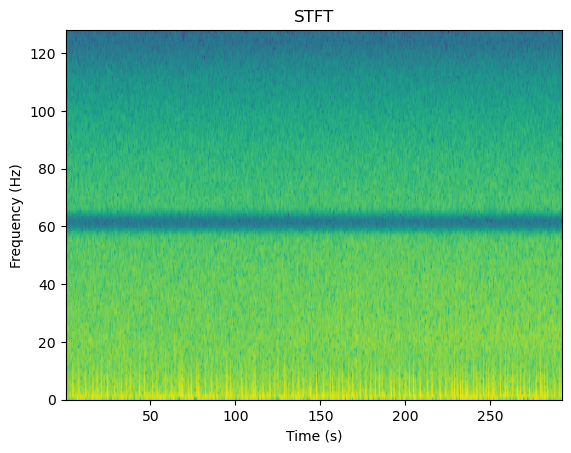

In [11]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 28
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

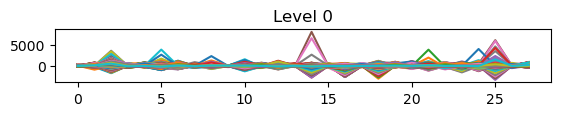

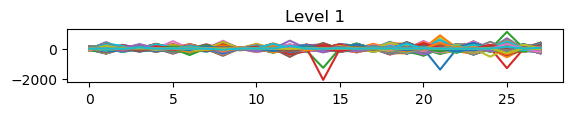

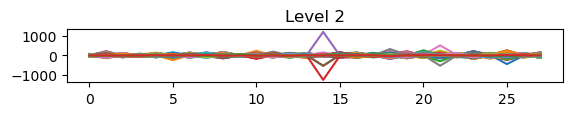

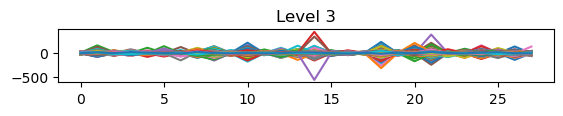

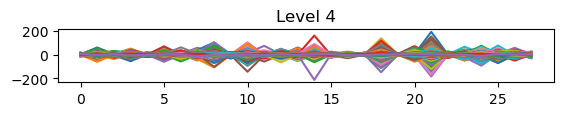

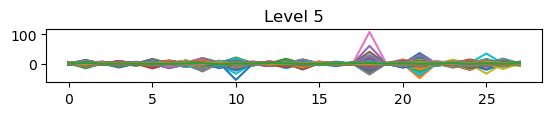

mean_spectrum: [3.42903764e+04 2.75058962e+03 3.78754557e+02 1.90239016e+02
 4.75244112e+01 1.97986766e+00]
var_spectrum: [1.05316378e+09 4.95987705e+06 7.89819906e+04 8.43940511e+04
 5.38928772e+03 4.62433573e+00]


In [12]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

for remaing data apart from first 28 subjects.

In [13]:
data = df2.iloc[:, :-2].values
ch_names = ['Fp1']*23
# extract the data values and the channel names
ch_types = ['eeg']*23
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)
# create the raw object
raw = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=23, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_24316\2646477564.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by number: 20 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_24316\3602276034.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Fitting ICA took 0.4s.


Method,fastica
Fit,11 iterations on raw data (75000 samples)
ICA components,20
Available PCA components,23
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


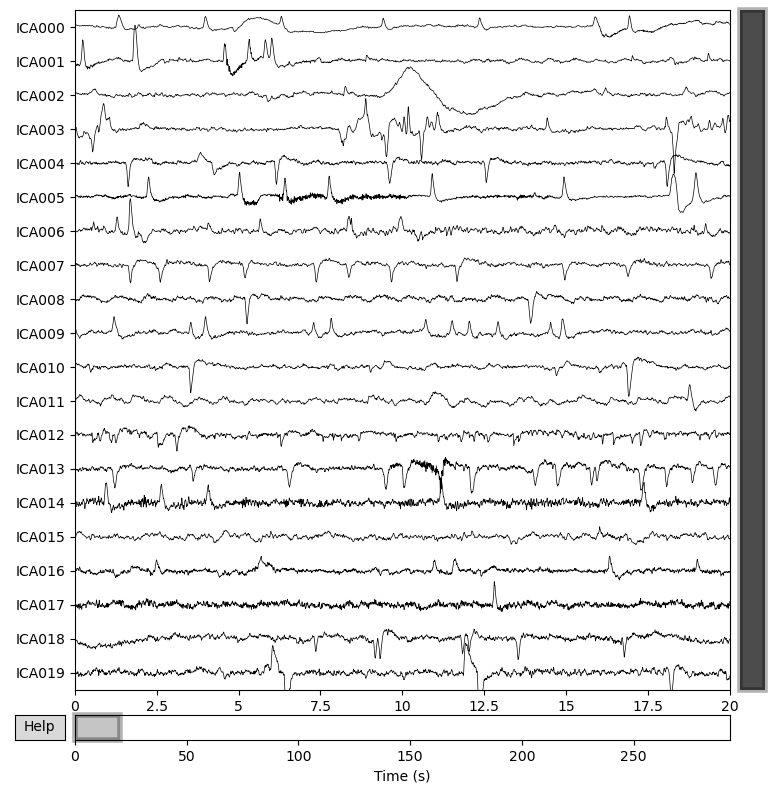

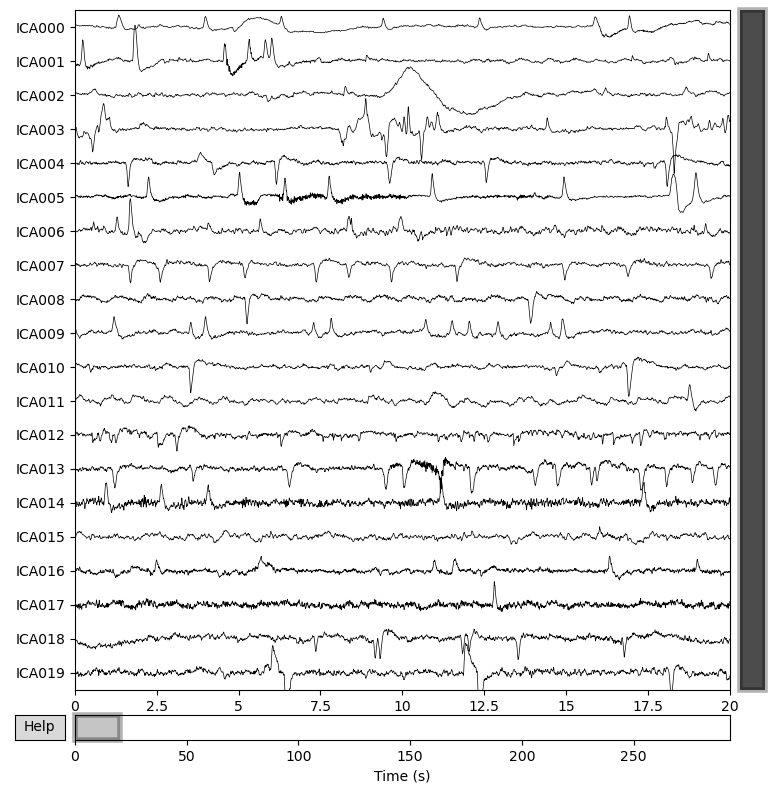

In [15]:
 ica.plot_sources(raw, block=False)

for component 0 blink are [11]


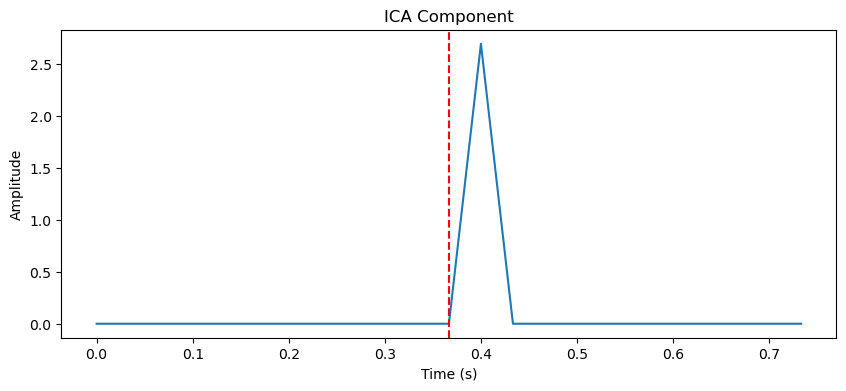

for component 1 blink are [11, 16]


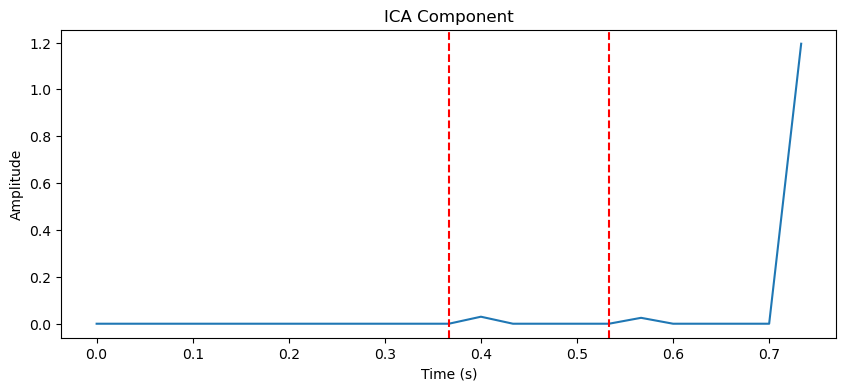

for component 2 blink are [2, 5]


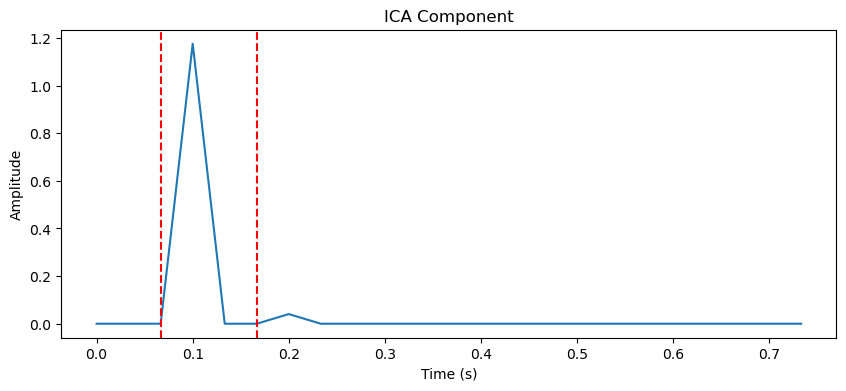

for component 3 blink are [5]


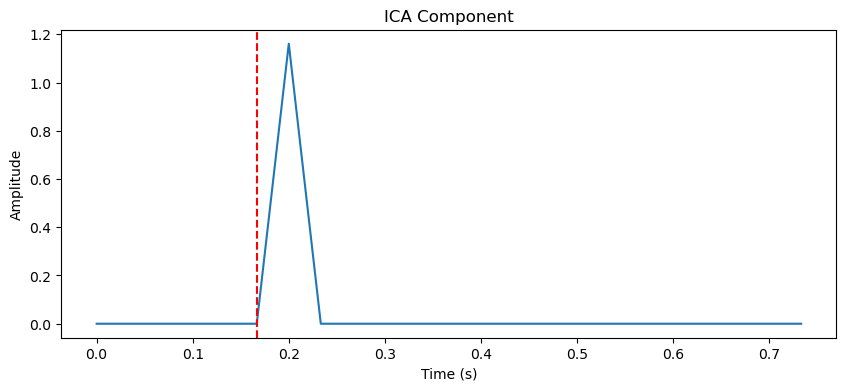

for component 4 blink are []


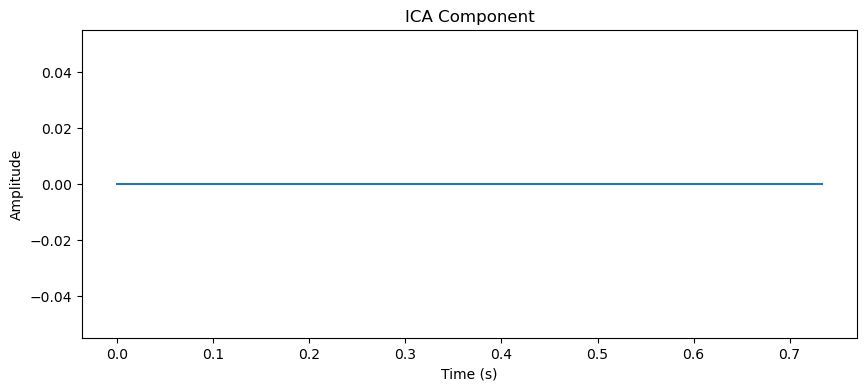

for component 5 blink are [11, 19]


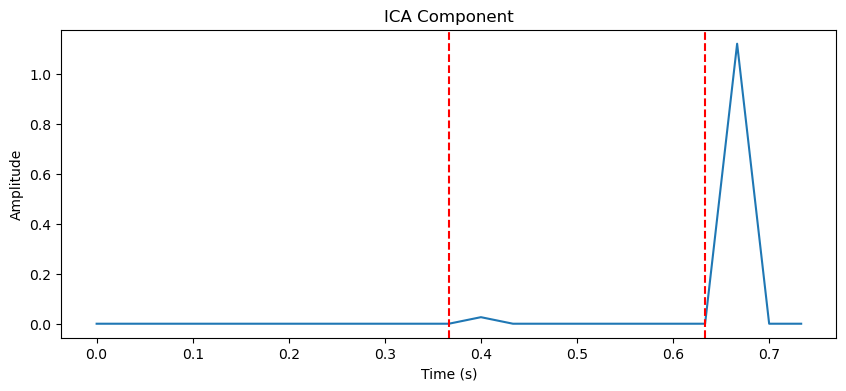

for component 6 blink are [5, 8, 16]


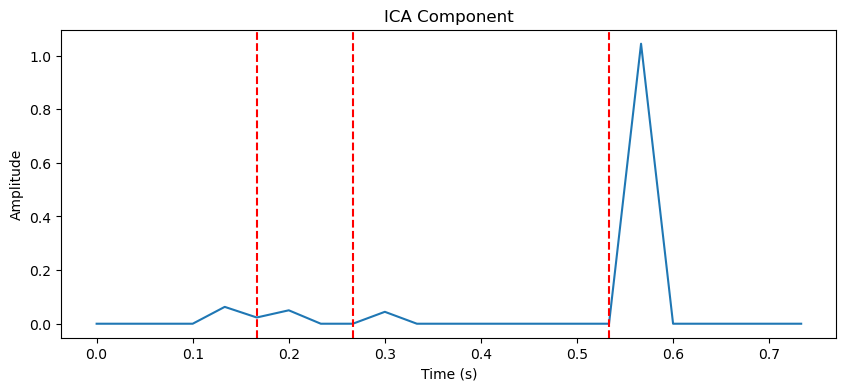

for component 7 blink are []


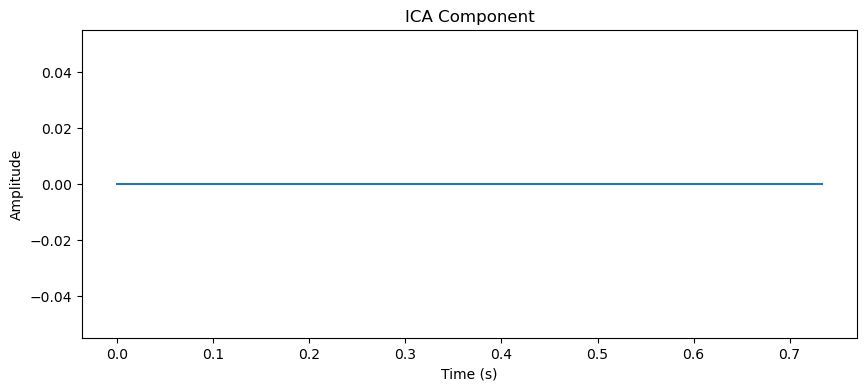

for component 8 blink are [8, 13, 16]


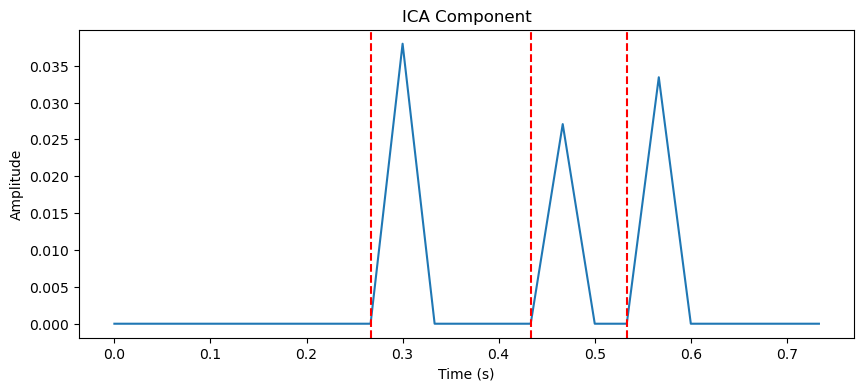

for component 9 blink are [16, 20]


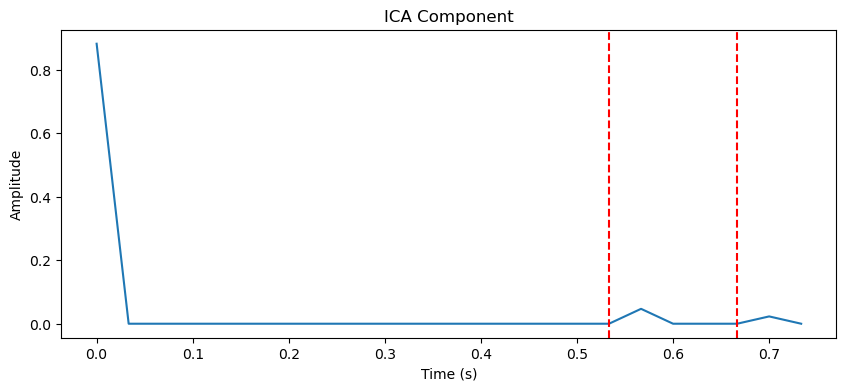

for component 10 blink are [11, 18]


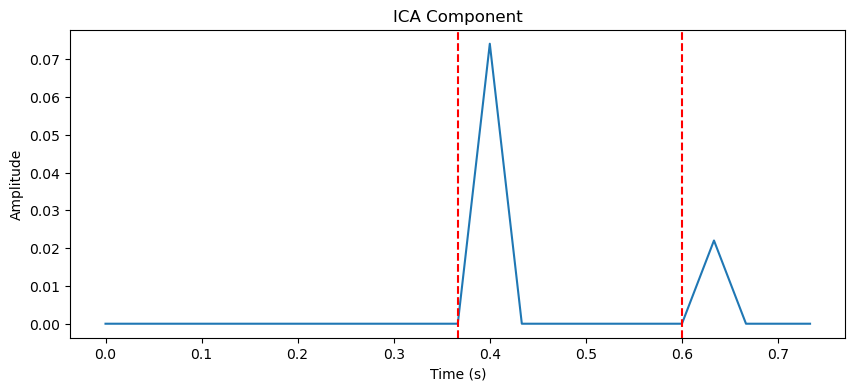

for component 11 blink are [3, 13]


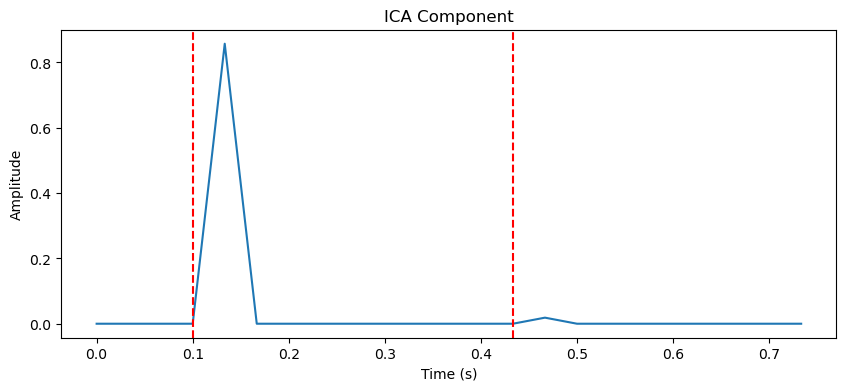

for component 12 blink are [4, 11, 16]


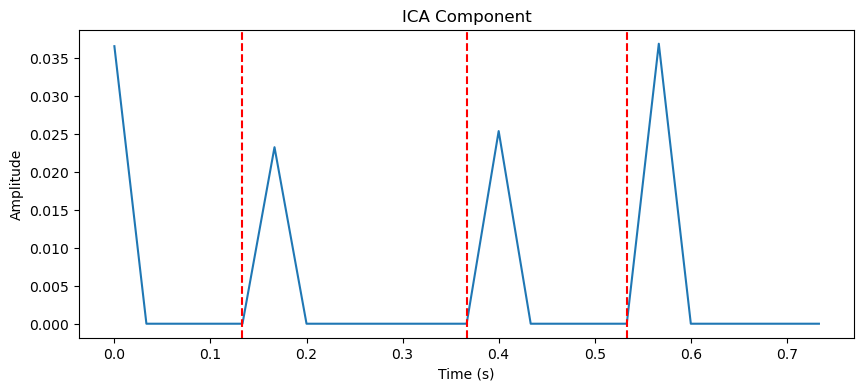

for component 13 blink are [8]


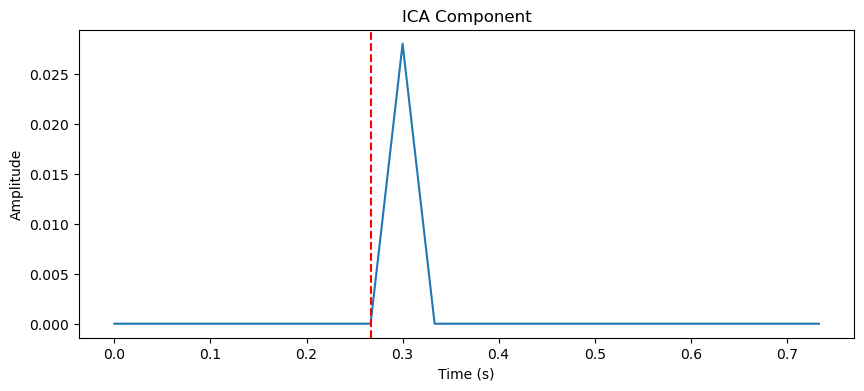

for component 14 blink are [5, 9, 11, 13, 16]


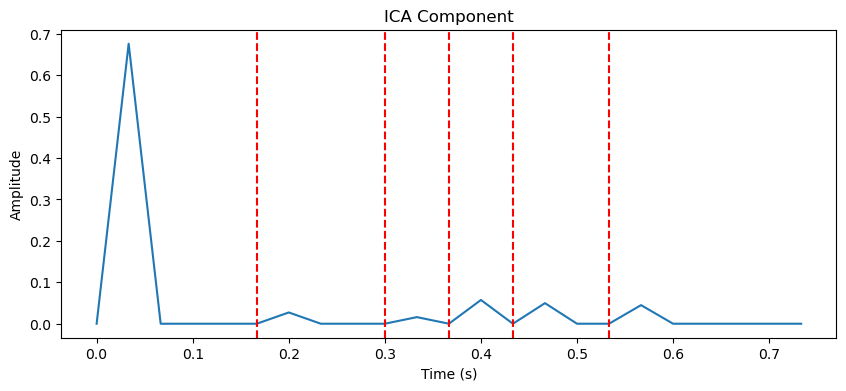

for component 15 blink are [3, 8, 14, 18, 20]


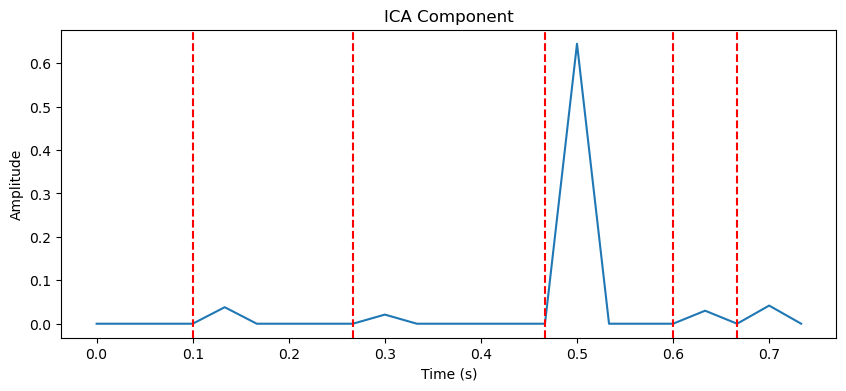

for component 16 blink are [1, 4, 7, 14, 17]


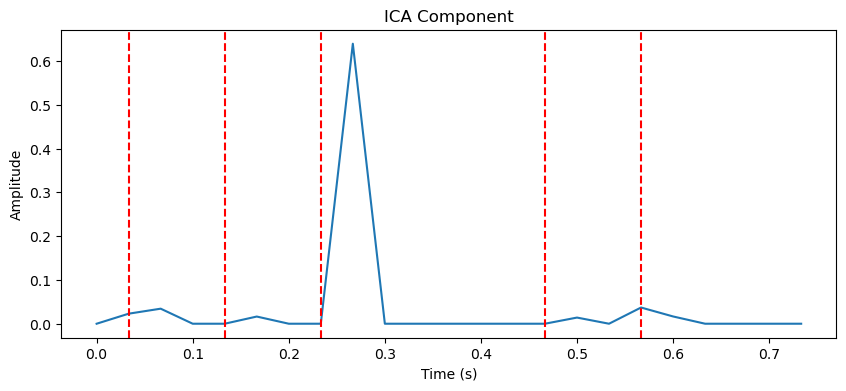

for component 17 blink are [6, 15, 17, 20]


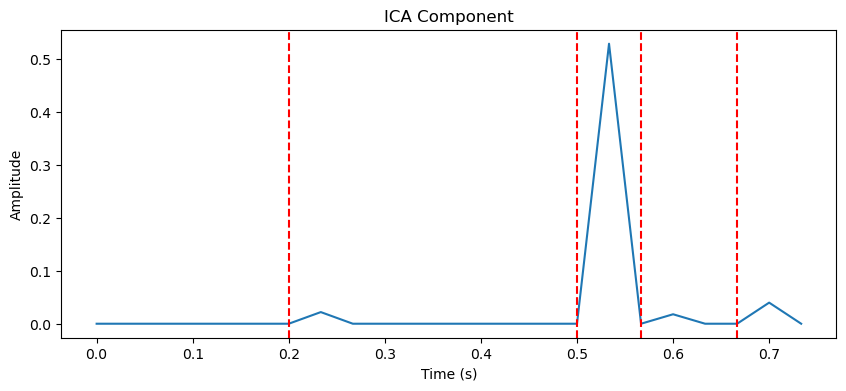

for component 18 blink are [5, 10]


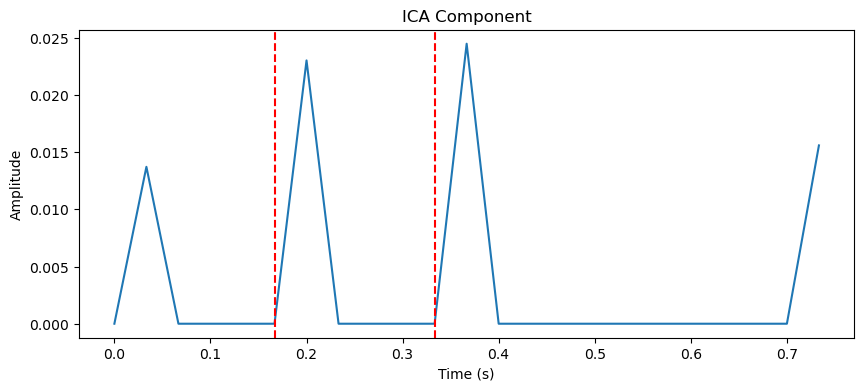

for component 19 blink are [1, 8, 11, 13]


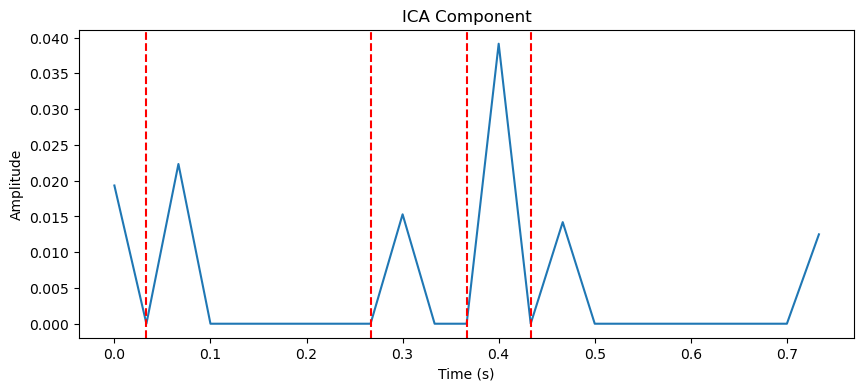

total number of blinks = 49


In [16]:
import numpy as np
from scipy.signal import find_peaks

def segment(y):
    """Extracts continuous segments of non-zero values from y."""
    s = np.concatenate(([0], np.flatnonzero(y), [len(y)]))
    return [y[s[i]:s[i+1]] for i in range(len(s)-1)], s

def blink_detection(y, fs):
    # Convert y to a NumPy array if it isn't already
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    
    """Detects blinks in a blink component y sampled at frequency fs."""
    lmin = fs // 50
    wmin = fs // 25
    wmax = fs
    
    # Calculate threshold as standard deviation of y
    threshold = 0.1* np.std(y)
    
    # Set all values below the threshold to zero
    y[y < threshold] = 0
    
    # Extract continuous segments of non-zero values from y
    Y, s = segment(y)
    #print("Y",Y)
    #print("s",s)
    t = []
    l = 0
    
    for j in range(len(Y)):
        N = len(Y[j])
        x = np.arange(N)
      
        # Find polynomial coefficients that fit Y[j]
        p = 3  # degree of polynomial
        X = np.vander(x, p+1)
       
        a = np.linalg.lstsq(X, Y[j], rcond=None)[0]
        
        # Compute the arc length of the fitted curve
       
        curve = np.polyval(a[::-1], x)
        try:
            alen = np.sum(np.sqrt(1 + np.gradient(curve)**2)) / N
        except ValueError:
            # Continue if an error occurs
            continue
        #print("j",j)   
        if wmin < N and N < wmax and lmin < alen:
            # Find the peak value and position within Y[j]
            #print("j",j)
            v = np.max(Y[j])
            p = np.argmax(Y[j])
            
            # Compute the angle between the peak and the ends of the curve
            alpha1 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], 0), p/fs)
            alpha2 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], N-1), (N-p-1)/fs)
            
            if alpha1 > 80 and alpha2 < 100:
                tl = s[j] + p - 1
                if(tl>0):
                    t.append(tl)
                    l += 1
    
    return t

b=0
e=0
fs = 30 # example sampling frequency
for i in range(ica.n_components_):
        component = ica.get_components()[:, i]
        blink_indices = blink_detection(component, fs)
        #b=b+sum(blink_indices)
        e=e+len(blink_indices)
        print("for component",i,"blink are",blink_indices)
        # Create a time axis based on the sampling frequency
        t = np.arange(len(component)) / fs
        # Plot the component signal
        plt.figure(figsize=(10, 4))
        plt.plot(t, component)
        plt.title('ICA Component')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        # Plot vertical lines at the times of the detected blinks
        for blink_index in blink_indices:
            plt.axvline(x=t[blink_index], color='r', linestyle='--')
    
        plt.show()
print("total number of blinks =",e)

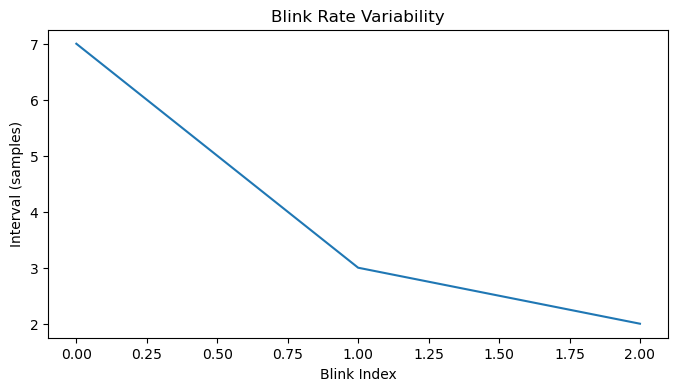

In [17]:
# Calculate blink rate variability
brv = []
for i in range(len(blink_indices)-1):
    brv.append(blink_indices[i+1] - blink_indices[i])

# Plot blink rate variability
plt.figure(figsize=(8, 4))
plt.plot(brv)
plt.title('Blink Rate Variability')
plt.xlabel('Blink Index')
plt.ylabel('Interval (samples)')
plt.show()


Effective window size : 0.090 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


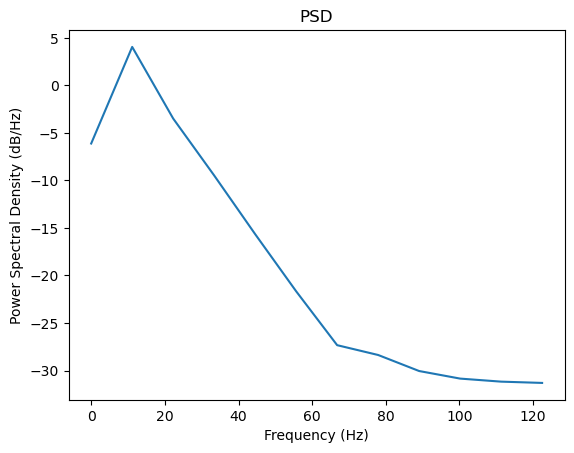

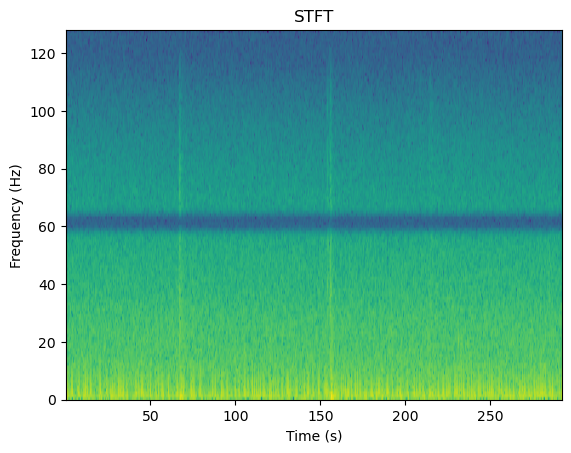

In [18]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 23
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

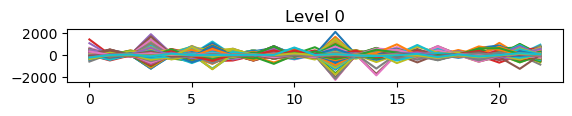

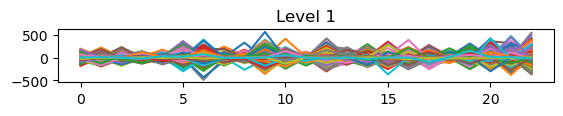

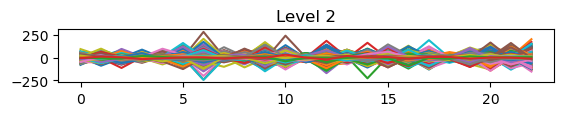

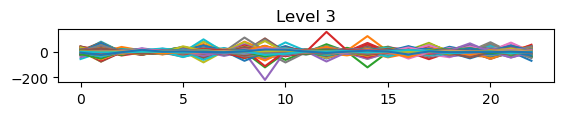

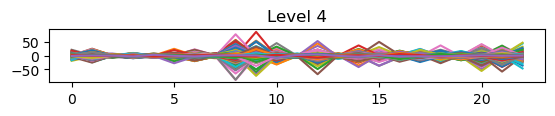

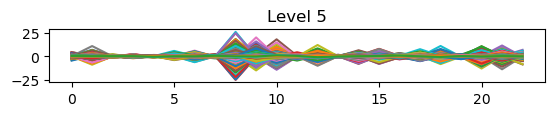

mean_spectrum: [1.66168726e+04 1.67057256e+03 2.72020738e+02 5.41911565e+01
 7.42151181e+00 2.65648550e-01]
var_spectrum: [6.66282124e+08 1.67631101e+06 2.15724085e+04 1.61212146e+03
 2.80817783e+01 5.56725809e-02]


In [19]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)